In [1]:
import loess
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV

data = pd.read_csv('../data/synthData.csv',usecols=['Y', 'X1', 'X2'])
X = data[['X1', 'X2']].to_numpy()
y = data['Y'].to_numpy()

Configuramos y lanzamos un gridsearch variando los parámetros pero con la función de distancia fija **(norma 2)**

In [2]:
parameters = {'f': [0.05, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'degree' : [1, 2],
                'dist' : [2],
                'weight' : ['tricubic', 'bisquare']
                }

grid_search = GridSearchCV(estimator=loess.Loess(), cv=2, param_grid=parameters)
grid_search.fit(X=X, y=y)

results = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
print(grid_search.best_params_)
index = grid_search.best_index_
print(results[index])


{'degree': 2, 'dist': 2, 'f': 0.2, 'weight': 'tricubic'}
0.10108620715954393


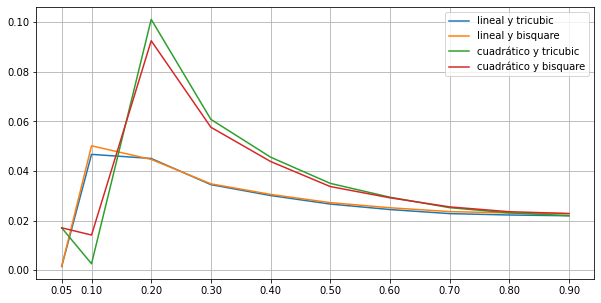

In [3]:
dictResults = {}
for index in range(len(results)):
    p = params[index]
    key = (p['degree'], p['weight'], p['dist'])
    if not key in dictResults:
        dictResults[key] = ([], [])
    dictResults[key][0].append(p['f'])
    dictResults[key][1].append(results[index])


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ])
for key, value in dictResults.items():
    regresor = 'lineal' if key[0] == 1 else 'cuadrático'
    label=f'{regresor} y {key[1]}' 
    ax.plot(value[0], value[1], label=label)

ax.legend(loc='upper right')



Configuramos y lanzamos un gridsearch variando los parámetros pero con la función de distancia fija **(norma 1)**

In [4]:
parameters = {'f': [0.05, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'degree' : [1, 2],
                'dist' : [1],
                'weight' : ['tricubic', 'bisquare']
                }

grid_search = GridSearchCV(estimator=loess.Loess(), cv=2, param_grid=parameters)
grid_search.fit(X=X, y=y)

results = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
print(grid_search.best_params_)
index = grid_search.best_index_
print(results[index])

{'degree': 2, 'dist': 1, 'f': 0.2, 'weight': 'bisquare'}
0.07288662550777096


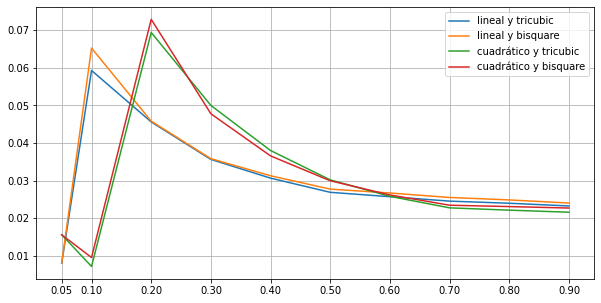

In [5]:
dictResults = {}
for index in range(len(results)):
    p = params[index]
    key = (p['degree'], p['weight'], p['dist'])
    if not key in dictResults:
        dictResults[key] = ([], [])
    dictResults[key][0].append(p['f'])
    dictResults[key][1].append(results[index])


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ])
for key, value in dictResults.items():
    regresor = 'lineal' if key[0] == 1 else 'cuadrático'
    label=f'{regresor} y {key[1]}' 
    ax.plot(value[0], value[1], label=label)

ax.legend(loc='upper right')
